In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Train.csv')
df_unseen = pd.read_csv('Test.csv')
print(f"df shape: {df.shape}")
print(f"columns: {df.columns}")

df shape: (8523, 12)
columns: Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [3]:
missing = set({'Item_Weight', 'Outlet_Size', 'Item_Visibility'})
print(f"missing: {missing}")
miss = list(missing)[2]
miss

missing: {'Item_Visibility', 'Outlet_Size', 'Item_Weight'}


'Item_Weight'

In [21]:
df_0 = df[['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]
df_0 = df_0[(df_0['Item_Visibility']!=0) & (df_0['Item_Weight'].isna()==False) & (df_0['Outlet_Size'].isna()==False)]
# test = df_0['Item_Identifier'].nunique()
df_0['Item_No'] = pd.factorize(df_0['Item_Identifier'])[0]
grouped = pd.DataFrame(df_0.groupby('Item_No')['Item_Weight'].nunique().reset_index())
grouped.to_csv('weight.csv')
# sns.histplot(data=grouped, x='Item_No', y='Item_Weight', kde=True,color='purple')

<Axes: >

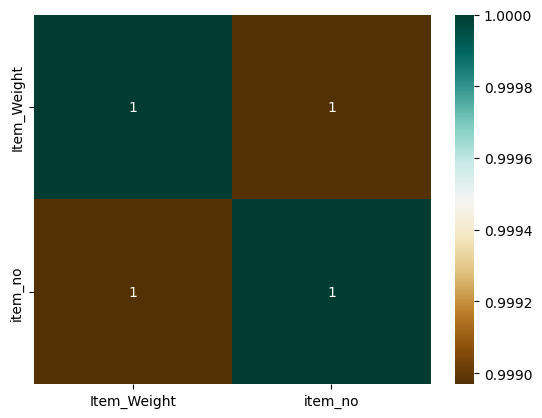

In [43]:
# Item_Weight
miss = 'Item_Weight'
key = 'Item_Identifier'
df_0 = df[getattr(df,miss).isna()==False][[miss, key]].sort_values(by=[miss, key])
# df_0 = df[getattr(df,miss).isna()==False][{'Item_Identifier', 'Item_Weight'}].sort_values(by=['Item_Weight', 'Item_Identifier'])
# df_0['test'] = pd.factorize(df_0['Item_Identifier'])[0].astype(int)
# df_0.corr()
df_0['item_no'] = pd.factorize(df_0[key])[0].astype(int)
sns.heatmap(df_0.corr(numeric_only=True), annot=True, cmap='BrBG')

<Axes: >

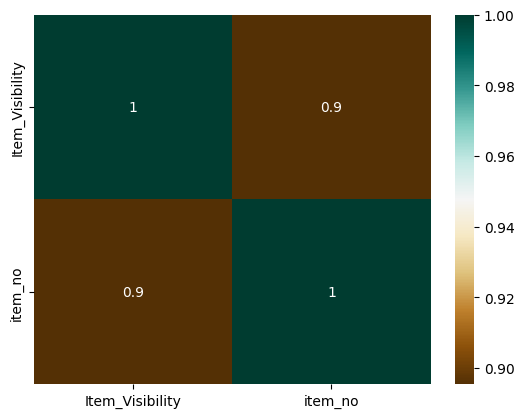

In [44]:
# Item_Visibility
miss = 'Item_Visibility'
key = 'Item_Identifier'
df_0 = df[getattr(df,miss)!=0][[miss, key]].sort_values(by=[miss, key])
# df_0 = df[getattr(df,miss).isna()==False][{'Item_Identifier', 'Item_Weight'}].sort_values(by=['Item_Weight', 'Item_Identifier'])
# df_0['test'] = pd.factorize(df_0['Item_Identifier'])[0].astype(int)
# df_0.corr()
df_0['item_no'] = pd.factorize(df_0[key])[0].astype(int)
sns.heatmap(df_0.corr(numeric_only=True), annot=True, cmap='BrBG')

In [45]:
df_0 = df.copy()
df_0

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
